<a href="https://colab.research.google.com/github/BuberDev/Artificial-Intelligence-ComputerVision/blob/main/Klasyfikator_wieloklasowy_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import plotly.express as px
import plotly.subplots as make_subplots
import plotly.graph_objects as go



In [ ]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape:', X_train.shape)
print(f'y_train shape:',y_train.shape)
print(f'X_test shape:', X_test.shape)
print(f'y_test shape', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

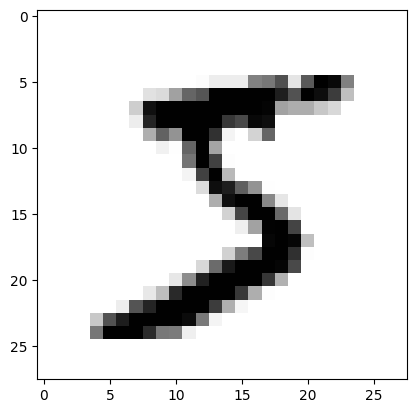

In [ ]:
plt.imshow(X_train[0], cmap="gray_r")

(-0.5, 27.5, 27.5, -0.5)

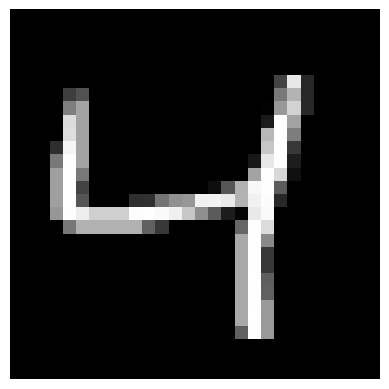

In [ ]:
plt.imshow(X_train[2], cmap="gray")
plt.axis("off")

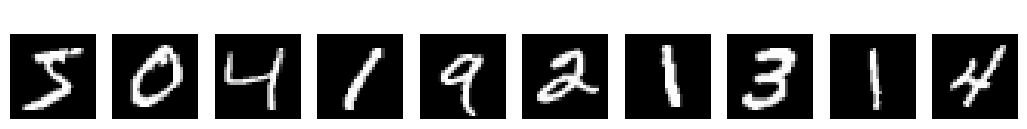

In [ ]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis("off")
  plt.imshow(X_train[i-1], cmap="gray")
  plt.title(y_train[i-1], color="white", fontsize=16)
plt.show()

In [ ]:
#Budowa sieci neuronowej
def build_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(units=128, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(units=10, activation="softmax"))

  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Trenowanie modelu

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 14s 5ms/step - loss: 0.3301 - accuracy: 0.9047 - val_loss: 0.1629 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1587 - accuracy: 0.9530 - val_loss: 0.1198 - val_accuracy: 0.9650
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1171 - accuracy: 0.9646 - val_loss: 0.0992 - val_accuracy: 0.9714
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0954 - accuracy: 0.9704 - val_loss: 0.0907 - val_accuracy: 0.9742
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0878 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0854 - val_accuracy

# Model Checkpoint

In [ ]:
!ls
!ls -l

sample_data
total 4
drwxr-xr-x 1 root root 4096 Jun 21 21:47 sample_data


In [ ]:
!pwd

/content


In [ ]:
!mkdir model

In [ ]:
# Zapisywanie wag po kazdej poprawie modelu
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = 'model/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [ ]:
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1499/1500 [============================>.] - ETA: 0s - loss: 0.3271 - accuracy: 0.9065
Epoch 1: val_accuracy improved from -inf to 0.95525, saving model to model/weights-01-0.9553.hdf5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3270 - accuracy: 0.9066 - val_loss: 0.1581 - val_accuracy: 0.9553
Epoch 2/10
1489/1500 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9537
Epoch 2: val_accuracy improved from 0.95525 to 0.96483, saving model to model/weights-02-0.9648.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1579 - accuracy: 0.9537 - val_loss: 0.1217 - val_accuracy: 0.9648
Epoch 3/10
1496/1500 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9649
Epoch 3: val_accuracy improved from 0.96483 to 0.97000, saving model to model/weights-03-0.9700.hdf5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1171 - accuracy: 0.9648 - val_loss: 0.1019 - val_accuracy: 0.9700
Epoch 4

In [ ]:
# Zapisanie najlepszego modelu

filepath = "best_model_weights.hdf5"
checkpoint= ModelCheckpoint(filepath=filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1484/1500 [============================>.] - ETA: 0s - loss: 0.3306 - accuracy: 0.9042
Epoch 1: val_accuracy improved from -inf to 0.95617, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3291 - accuracy: 0.9046 - val_loss: 0.1540 - val_accuracy: 0.9562
Epoch 2/10
1493/1500 [============================>.] - ETA: 0s - loss: 0.1564 - accuracy: 0.9537
Epoch 2: val_accuracy improved from 0.95617 to 0.96733, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1566 - accuracy: 0.9537 - val_loss: 0.1155 - val_accuracy: 0.9673
Epoch 3/10
1497/1500 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9650
Epoch 3: val_accuracy improved from 0.96733 to 0.97092, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1150 - accuracy: 0.9650 - val_loss: 0.1006 - val_accuracy: 0.9709
Epoch 4/10
1489/1500 [

In [ ]:
# Zaladowanie wag i ocena modelu
best_model = Sequential()
best_model.add(Flatten(input_shape=(28,28)))
best_model.add(Dense(units=128, activation="relu"))
best_model.add(Dropout(0.2))
best_model.add(Dense(units=10, activation="softmax"))


best_model.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

best_model.load_weights("best_model_weights.hdf5")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy)

0.9782999753952026


# Early stopping

In [ ]:
model = build_model()
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)


Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3304 - accuracy: 0.9047 - val_loss: 0.1595 - val_accuracy: 0.9542
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1619 - accuracy: 0.9517 - val_loss: 0.1167 - val_accuracy: 0.9659
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1208 - accuracy: 0.9636 - val_loss: 0.1045 - val_accuracy: 0.9680
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0953 - accuracy: 0.9714 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0826 - accuracy: 0.9747 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9771 - val_loss: 0.0819 - val_accuracy: 0.9761
Epoch 7/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0639 - accuracy: 0.9791 - val_loss: 0.0876 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.330374,0.904708,0.159522,0.954167
1,0.161908,0.951688,0.116656,0.965917
2,0.120802,0.963583,0.104513,0.968000
3,0.095251,0.971396,0.098304,0.972250
4,0.082567,0.974708,0.088803,0.974250


!pip install plotly


In [ ]:
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name="loss"), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['val_loss'], name="val_loss"), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name="accuracy"), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics["val_accuracy"], name="val_accuracy"),row=2, col=1)

fig.update_layout(width=800)

In [ ]:
# Earlstoppimg

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3290 - accuracy: 0.9044 - val_loss: 0.1602 - val_accuracy: 0.9537
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1582 - accuracy: 0.9531 - val_loss: 0.1161 - val_accuracy: 0.9663
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1179 - accuracy: 0.9653 - val_loss: 0.1049 - val_accuracy: 0.9681
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0971 - accuracy: 0.9710 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.0887 - val_accuracy: 0.9737
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0872 - val_accuracy: 0.9755
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0617 - accuracy: 0.9803 - val_loss: 0.0826 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.329008,0.904437,0.160198,0.953667
1,0.158199,0.953083,0.116083,0.966250
2,0.117937,0.965271,0.104927,0.968083
3,0.097144,0.970979,0.088753,0.974250
4,0.076634,0.976354,0.088704,0.973667


In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name="loss"), row=1, col=1 )
fig.add_trace(go.Scatter(y=metrics['val_loss'], name="val_loss"), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name="accuracy"), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics['val_accuracy'], name="val_accuracy"), row=2, col=1)
fig.update_layout(width=800)

# Tensorboard

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

!rm -rf ./logs

log_dir = 'logs/fit/' + dt.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir = log_dir)

model = build_model()
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3246 - accuracy: 0.9060 - val_loss: 0.1582 - val_accuracy: 0.9523
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1558 - accuracy: 0.9540 - val_loss: 0.1173 - val_accuracy: 0.9653
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1187 - accuracy: 0.9649 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0961 - val_accuracy: 0.9707
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0795 - accuracy: 0.9749 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9793 - val_loss: 0.0809 - val_accuracy:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload --logdir logs

2023-06-22 21:37:27.873014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   KGG-HFZ-FTV



In [ ]:
yes